# **French Noun Gender Classification in Word Embeddings: SHAP & LIME Analysis on a Perceptron Model**

# Step 1: Dataset Laoding (French Nouns Embeddings)

In [1]:
!pip install gdown


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import gdown
import pandas as pd

# Define the French Nouns Embeddings files links and corresponding output file names
file_links = {
    #"camem_bert_base_embeddings": "1D7jbsNIinPTapETRzWimlPyU0y8tx49P",
    #"distilled_bert_base_cased": "1B_v8U57fw-fQ21PCDfUYDXgcxYRGNPIV",
    "flaubert_base_cased": "1VGs8vbTpg4OgRV7zMPwRbIo9aEYdqxC3",
    "flaubert_base_uncased": "155ScHgNyDdzkyHjV96eaT6yDFG3i-fke",
    "flaubert_large_uncased": "1sLIFHTkJ43CedB6uJBY8OVvfGbigqtV7",
    "flaubert_small_cased": "10xGIcEBfpbIdxC6kFDA4_qjxbEz_SJcT",
    #"mbert_base_cased": "1ULJOGhMS7bpXruv3sS1UJLyhDFAznXVE",
    #"mbert_base_uncased": "1MBTqcVxvwVPbnDBxqy7BPxx72ZOxIsw_",
    #"xlmr_r_large": "1J43o7gZslJemN8HMdSPzkhENMW52wFVX",
    #"xlm_roberta_base": "1MeYKcyXWpBNYhiYHMVHlwEgkWomyufxX"
}

# Dictionary to store dataframes
dataframes = {}

# Download files and load into dataframes
for name, file_id in file_links.items():
    output_file = f"{name}.csv"
    gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

    try:
        df = pd.read_csv(output_file)  # Try loading as CSV
    except Exception:
        try:
            df = pd.read_excel(output_file)  # Try loading as Excel
        except Exception:
            df = None  # If neither CSV nor Excel, set to None

    if df is not None:
        dataframes[name] = df
        print(f"Loaded {name} into dataframe with shape {df.shape}")
    else:
        print(f"Failed to load {name}, file format unknown.\n\n")


Downloading...
From (original): https://drive.google.com/uc?id=1VGs8vbTpg4OgRV7zMPwRbIo9aEYdqxC3
From (redirected): https://drive.google.com/uc?id=1VGs8vbTpg4OgRV7zMPwRbIo9aEYdqxC3&confirm=t&uuid=daad6738-b373-4f64-b089-c06297a1b739
To: c:\Users\Stephanie\Desktop\Steph-Nancy\M1-S2\supervised project\HarvestWE-main\supervised-project\flaubert_base_cased.csv
100%|██████████| 111M/111M [00:11<00:00, 9.44MB/s] 


Loaded flaubert_base_cased into dataframe with shape (13481, 770)


Downloading...
From (original): https://drive.google.com/uc?id=155ScHgNyDdzkyHjV96eaT6yDFG3i-fke
From (redirected): https://drive.google.com/uc?id=155ScHgNyDdzkyHjV96eaT6yDFG3i-fke&confirm=t&uuid=bc55a84c-22e9-44af-9e14-994efe0c474e
To: c:\Users\Stephanie\Desktop\Steph-Nancy\M1-S2\supervised project\HarvestWE-main\supervised-project\flaubert_base_uncased.csv
100%|██████████| 137M/137M [00:11<00:00, 11.7MB/s] 


Loaded flaubert_base_uncased into dataframe with shape (16504, 770)


Downloading...
From (original): https://drive.google.com/uc?id=1sLIFHTkJ43CedB6uJBY8OVvfGbigqtV7
From (redirected): https://drive.google.com/uc?id=1sLIFHTkJ43CedB6uJBY8OVvfGbigqtV7&confirm=t&uuid=82102175-8a18-4144-94b5-601e54854c3f
To: c:\Users\Stephanie\Desktop\Steph-Nancy\M1-S2\supervised project\HarvestWE-main\supervised-project\flaubert_large_uncased.csv
100%|██████████| 142M/142M [00:13<00:00, 10.8MB/s] 


Loaded flaubert_large_uncased into dataframe with shape (13481, 1026)


Downloading...
From: https://drive.google.com/uc?id=10xGIcEBfpbIdxC6kFDA4_qjxbEz_SJcT
To: c:\Users\Stephanie\Desktop\Steph-Nancy\M1-S2\supervised project\HarvestWE-main\supervised-project\flaubert_small_cased.csv
100%|██████████| 71.9M/71.9M [00:09<00:00, 7.29MB/s]


Loaded flaubert_small_cased into dataframe with shape (13481, 514)


# Step 2: Exploratory Data Analysis (EDA)

### 2.1 Dataset Head

In [3]:
# Display first few rows of each loaded dataframe
for name, df in dataframes.items():
    print(f"\nDataset: {name}")
    display(df.head())  # Display first few rows
    print("=" * 80)



Dataset: flaubert_base_cased


,Word,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,Gender
0,2D,-0.003410,-2.942859,0.415028,0.284486,3.430643,0.548636,-0.653722,-1.674650,-2.424176,...,0.392765,2.454749,3.391566,2.226161,-0.906475,-1.962978,-1.470658,-3.204519,0.193312,0
1,3D,-2.482999,0.537969,-0.967259,2.772490,0.571534,-1.665220,2.876226,0.021730,-0.097758,...,-0.829459,-1.088251,1.335723,-0.214461,3.245200,-0.394857,-3.726279,-1.504977,3.011770,0
2,a,-2.973347,0.117011,-0.665424,3.422699,1.083267,-1.953192,1.687308,-1.215286,-1.035289,...,0.095561,-0.922362,2.607434,-0.063993,1.063567,-0.108695,-2.430608,-0.913492,2.560120,1
3,aa,-3.831072,1.321632,2.532039,-2.400577,-0.922953,0.244394,-0.972499,1.564938,3.582069,...,0.007120,1.909948,-0.614158,0.167209,-2.587294,0.638067,-1.564009,-1.981212,2.227041,1
4,aba,-1.225610,-0.145831,1.085824,-1.501620,-1.229859,1.462455,0.080811,-1.534320,1.281341,...,-1.460710,-1.651668,1.739525,-0.320779,-1.115654,-2.525828,-0.230096,-2.663861,0.037247,1



Dataset: flaubert_base_uncased


,Word,0,1,2,3,4,5,6,7,8,...,759,760,761,762,763,764,765,766,767,Gender
0,2D,2.069451,-0.196946,-0.590452,-0.294679,-0.126191,-1.256255,1.086165,-1.670000,0.156369,...,2.397997,-1.713811,0.751924,-2.147450,2.056054,1.237907,1.331889,0.176321,-1.683485,0
1,3D,0.987226,0.040561,-3.228347,-1.496991,-0.892471,0.200008,0.807684,0.251609,0.261199,...,1.673949,-2.785205,1.497909,-0.379167,-0.084702,0.921880,1.755586,0.958315,-0.830866,0
2,a,2.473813,0.240140,-0.998067,-0.393851,-2.040323,-0.410483,-1.244400,-0.335741,-0.137402,...,0.913577,-1.004304,0.370865,0.365652,1.048086,0.247753,-0.848047,-2.219805,-0.007960,1
3,aa,2.291961,3.423827,0.367711,0.765133,-0.857717,0.061944,1.942902,-2.305587,-3.050834,...,2.021903,-2.888584,0.451671,-0.413568,-1.191705,1.874531,-1.417624,-0.526818,-1.402899,1
4,aba,2.334413,-0.435559,-1.369356,-0.191412,-0.985617,-2.350507,-0.048486,-0.749492,-1.948081,...,0.953662,-1.434511,0.516787,-1.252479,-2.272759,1.690874,2.827625,-0.663541,0.745179,1



Dataset: flaubert_large_uncased


,Word,0,1,2,3,4,5,6,7,8,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Gender
0,2D,2.349751,-6.180511,4.166406,9.794186,-6.292492,3.494754,-6.183371,-2.550185,-7.428347,...,-2.155390,1.694553,4.313848,0.650875,3.817881,-0.750011,13.997417,-8.864519,0.657211,0
1,3D,1.858130,-5.378810,3.406198,-0.489852,-10.070462,2.676319,-1.824387,0.815318,-3.428590,...,-4.358321,6.512702,0.308002,3.050550,-6.196063,-2.793685,11.858439,-11.934921,-2.199292,0
2,a,8.071820,-1.721559,6.124100,8.248170,-3.370623,-0.764793,8.454268,2.946257,0.738389,...,-3.591910,11.312113,1.324170,-12.567185,4.586447,-3.293847,8.172892,-12.959602,1.821460,1
3,aa,9.052979,2.525067,6.767379,5.078607,-2.846812,-1.025761,-1.174740,-1.383830,2.114241,...,-11.937176,8.415228,-3.028422,1.840215,-4.270086,-0.049216,6.270343,-9.004971,-5.743093,1
4,aba,6.330437,-7.137898,0.668696,-2.687427,1.569957,-12.535857,-8.297080,-7.934600,7.617362,...,-6.060742,3.974230,8.077003,5.035424,5.153873,-17.188019,10.054430,-21.021303,-6.343835,1



Dataset: flaubert_small_cased


,Word,0,1,2,3,4,5,6,7,8,...,503,504,505,506,507,508,509,510,511,Gender
0,2D,5.531169,-8.963815,1.558321,3.143552,-5.372140,-0.173998,-1.124774,5.729995,-2.367392,...,5.237968,-0.666145,2.222498,-2.044494,-0.161615,-2.374312,-7.161043,2.704915,-4.613959,0
1,3D,3.969330,-6.442654,1.451927,3.447789,-4.224667,-1.029559,-3.664734,4.911455,0.223901,...,5.630971,-3.309551,0.908108,-0.559715,-0.491484,-1.463476,-10.008976,2.005877,-2.951386,0
2,a,1.621909,-1.563334,-2.426637,-1.438067,-1.388713,-6.022452,0.529605,5.798125,-1.673958,...,5.492917,-1.754299,-2.933638,-3.008871,-6.436571,-3.332312,-5.462241,-0.065580,-2.128897,1
3,aa,5.617860,-6.741740,2.519836,-3.914260,2.801902,-1.182261,4.435669,-1.600745,-0.582458,...,-3.897178,-0.805951,-1.033487,1.398769,-6.305580,-0.108586,0.809530,-10.274058,2.984733,1
4,aba,4.914317,-6.923123,-3.848756,5.110575,-2.516105,-4.938291,2.373579,-2.756590,2.567553,...,0.679011,-2.095396,-4.307210,-0.017772,-6.159315,-0.979261,-2.605049,-7.204095,-4.154817,1


### 2.2 Embedding Dimensions in Model

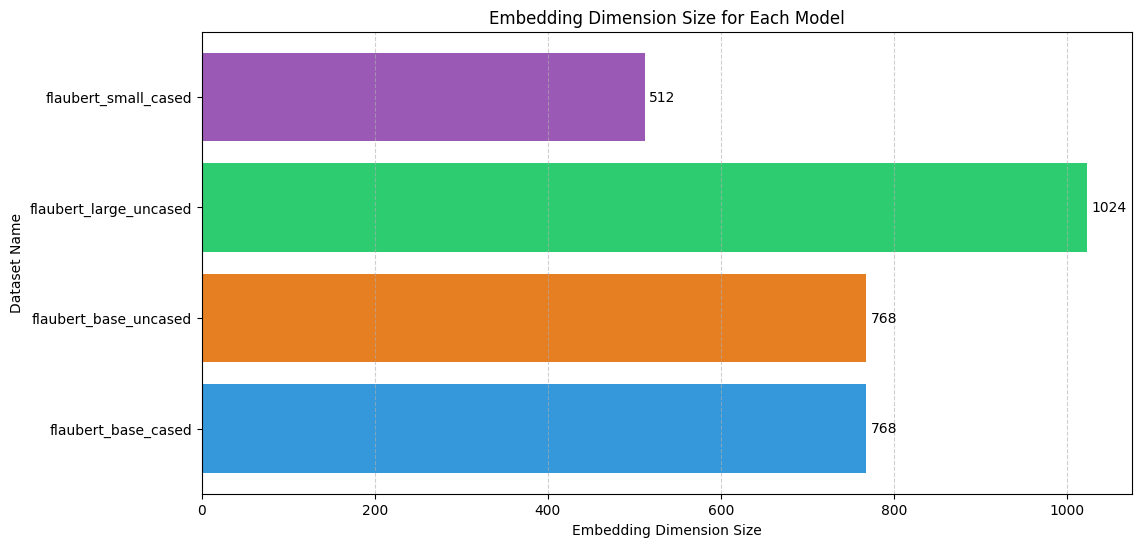

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define alternating colors
bar_colors = ["#3498db", "#e67e22", "#2ecc71", "#9b59b6", "#f1c40f", "#1abc9c", "#d35400", "#16a085", "#c0392b", "#2980b9"]

# Function to plot embedding dimension length with alternating colors
def plot_embedding_dimensions(dataframes):
    dataset_names = []
    embedding_sizes = []

    # Extract embedding sizes
    for name, df in dataframes.items():
        # The number of embedding dimensions is the total columns minus the "Word" and "Gender" columns
        if "Gender" in df.columns and "Word" in df.columns:
            embedding_size = df.shape[1] - 2  # Subtract "Word" and "Gender" columns
        else:
            embedding_size = df.shape[1] - 1  # If "Gender" is missing, assume only "Word" is non-embedding

        dataset_names.append(name)
        embedding_sizes.append(embedding_size)

    # Create horizontal bar chart
    y_positions = np.arange(len(dataset_names))  # Y-axis positions

    plt.figure(figsize=(12, 6))

    # Plot bars with alternating colors
    for i, (name, size) in enumerate(zip(dataset_names, embedding_sizes)):
        plt.barh(y_positions[i], size, color=bar_colors[i % len(bar_colors)])  # Alternate colors
        plt.text(size + 5, y_positions[i], str(size), va="center", fontsize=10, color="black")

    # Labels and Title
    plt.xlabel("Embedding Dimension Size")
    plt.ylabel("Dataset Name")
    plt.title("Embedding Dimension Size for Each Model")
    plt.yticks(y_positions, dataset_names)  # Set dataset names on y-axis
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    # Show plot
    plt.show()

# Call the function to plot embedding dimension lengths
plot_embedding_dimensions(dataframes)


### 2.4 Class Distribution and Balancing

Showing  French Nouns Original Gender Distribution:


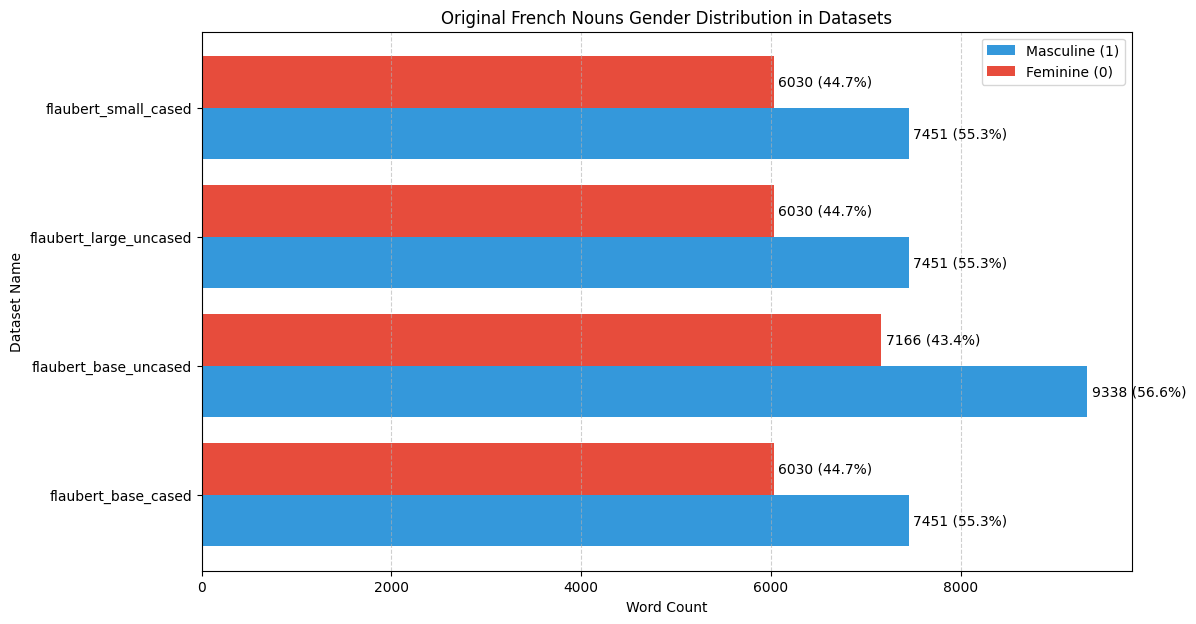

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot gender distribution as a horizontal bar chart
def plot_gender_distribution_bar_chart(dataframes, title="Gender Distribution in Datasets"):
    dataset_names = []
    masculine_counts = []
    feminine_counts = []
    total_counts = []

    # Extract gender counts for each dataset
    for name, df in dataframes.items():
        if "Gender" in df.columns:
            gender_counts = df["Gender"].value_counts()
            dataset_names.append(name)
            masculine_count = gender_counts.get(1, 0)  # Count Masculine (1)
            feminine_count = gender_counts.get(0, 0)  # Count Feminine (0)
            total_count = masculine_count + feminine_count  # Total words

            masculine_counts.append(masculine_count)
            feminine_counts.append(feminine_count)
            total_counts.append(total_count)

    # Convert counts to percentages
    masculine_percentages = [round((m / t) * 100, 1) if t > 0 else 0 for m, t in zip(masculine_counts, total_counts)]
    feminine_percentages = [round((f / t) * 100, 1) if t > 0 else 0 for f, t in zip(feminine_counts, total_counts)]

    # Bar width
    bar_width = 0.4
    y_positions = np.arange(len(dataset_names))  # Y-axis positions

    # Create figure
    plt.figure(figsize=(12, 7))

    # Plot bars for Masculine and Feminine
    plt.barh(y_positions - bar_width/2, masculine_counts, height=bar_width, label="Masculine (1)", color="#3498db")
    plt.barh(y_positions + bar_width/2, feminine_counts, height=bar_width, label="Feminine (0)", color="#e74c3c")

    # Add data labels (both count and percentage) on bars
    for i, (m_count, f_count, m_percent, f_percent) in enumerate(zip(masculine_counts, feminine_counts, masculine_percentages, feminine_percentages)):
        plt.text(m_count + 50, y_positions[i] - bar_width/2, f"{m_count} ({m_percent}%)", va="center", fontsize=10, color="black")
        plt.text(f_count + 50, y_positions[i] + bar_width/2, f"{f_count} ({f_percent}%)", va="center", fontsize=10, color="black")

    # Labels and Title
    plt.xlabel("Word Count")
    plt.ylabel("Dataset Name")
    plt.title(title)
    plt.yticks(y_positions, dataset_names)  # Set dataset names on y-axis
    plt.legend()
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    # Show plot
    plt.show()

# Show original distribution
print("Showing  French Nouns Original Gender Distribution:")
plot_gender_distribution_bar_chart(dataframes, title="Original French Nouns Gender Distribution in Datasets")


Showing French Nouns Gender Distribution After Undersampling:


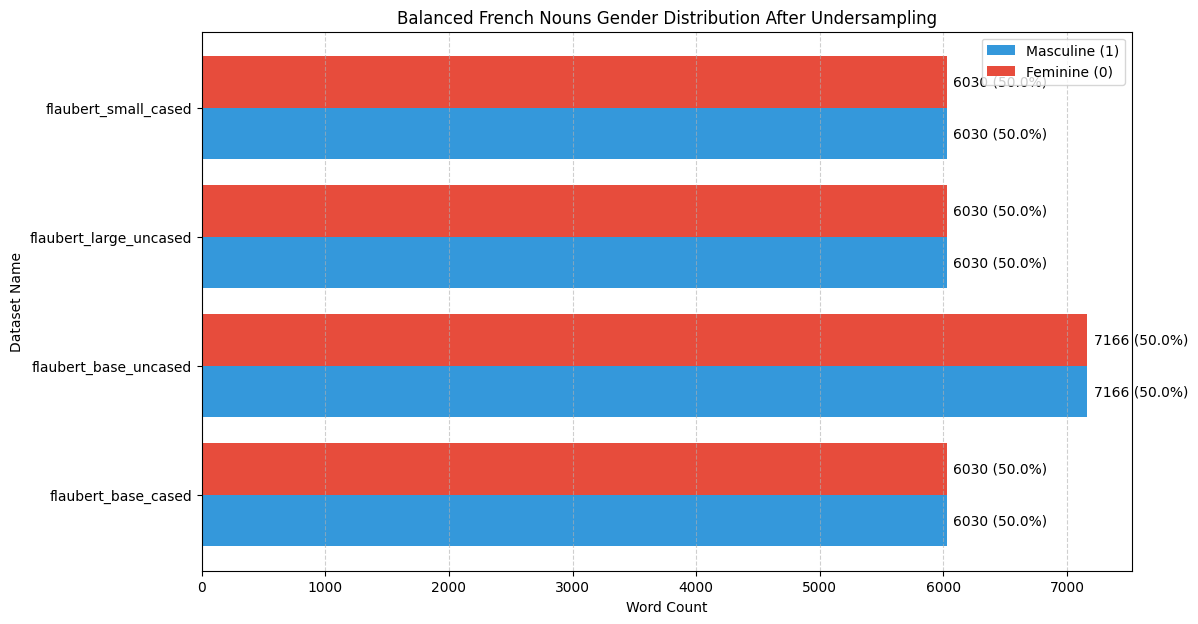

In [10]:
# Apply undersampling (reduce larger class to match smaller class)
balanced_dataframes = {}
for name, df in dataframes.items():
    if "Gender" in df.columns:
        masculine_df = df[df["Gender"] == 1]
        feminine_df = df[df["Gender"] == 0]

        # Find the smaller class size
        min_class_size = min(len(masculine_df), len(feminine_df))

        # Randomly sample from both classes
        masculine_sampled = masculine_df.sample(min_class_size, random_state=42)
        feminine_sampled = feminine_df.sample(min_class_size, random_state=42)

        # Concatenate and shuffle
        balanced_df = pd.concat([masculine_sampled, feminine_sampled]).sample(frac=1, random_state=42)

        # Store the balanced dataset
        balanced_dataframes[name] = balanced_df

# Show distribution after balancing
print("\nShowing French Nouns Gender Distribution After Undersampling:")
plot_gender_distribution_bar_chart(balanced_dataframes, title="Balanced French Nouns Gender Distribution After Undersampling")


# Step 3) Train a Multilayerr Perceptron (MLP) (Baseline on all Embeddings)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Set dataset size percentage for training
dataset_percentage = 100  # Change this to any value between 1 and 100

# Dictionary to store model performance
model_accuracies = {}

# Dictionary to store trained models and test data
trained_models = {}
test_data = {}

# Loop through each dataset and train an MLP model
for name, df in dataframes.items():
    print("-" * 70)
    print(f"\nTraining MLP Model on {name} Dataset...")

    # Ensure dataset has "Gender" and embeddings (excluding "Word" column)
    if "Gender" in df.columns and "Word" in df.columns:
        X = df.drop(columns=["Word", "Gender"]).values
        y = df["Gender"].values
    else:
        print(f"Skipping {name} (Missing required columns)")
        continue

    # Check if dataset is too small
    if len(df) < 2:
        print(f"{name} dataset is too small, skipping...")
        continue

    # Sample the desired percentage
    if dataset_percentage < 100:
        X_sample, _, y_sample, _ = train_test_split(
            X, y,
            train_size=dataset_percentage / 100,
            stratify=y,
            random_state=42
        )
    else:
        X_sample = X
        y_sample = y

    # Split into training (80%) and testing (20%)
    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample,
        test_size=0.2,
        stratify=y_sample,
        random_state=42
    )

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train MLP model
    mlp = MLPClassifier(
        hidden_layer_sizes=(100,),  # You can adjust this (e.g., (50, 50) for 2 layers)
        max_iter=500,
        random_state=42
    )
    mlp.fit(X_train, y_train)

    # Store model and test data
    trained_models[name] = mlp
    test_data[name] = X_test

    # Evaluate
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

    print(f"\nAccuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, target_names=["Feminine (0)", "Masculine (1)"]))


----------------------------------------------------------------------

Training MLP Model on flaubert_base_cased Dataset...

Accuracy: 0.7794
               precision    recall  f1-score   support

 Feminine (0)       0.76      0.74      0.75      1206
Masculine (1)       0.79      0.81      0.80      1491

     accuracy                           0.78      2697
    macro avg       0.78      0.78      0.78      2697
 weighted avg       0.78      0.78      0.78      2697

----------------------------------------------------------------------

Training MLP Model on flaubert_base_uncased Dataset...

Accuracy: 0.6616
               precision    recall  f1-score   support

 Feminine (0)       0.63      0.55      0.58      1433
Masculine (1)       0.68      0.75      0.71      1868

     accuracy                           0.66      3301
    macro avg       0.65      0.65      0.65      3301
 weighted avg       0.66      0.66      0.66      3301

----------------------------------------------

### 3.1 Evaluate Performance of MLP (on all available embeddings)

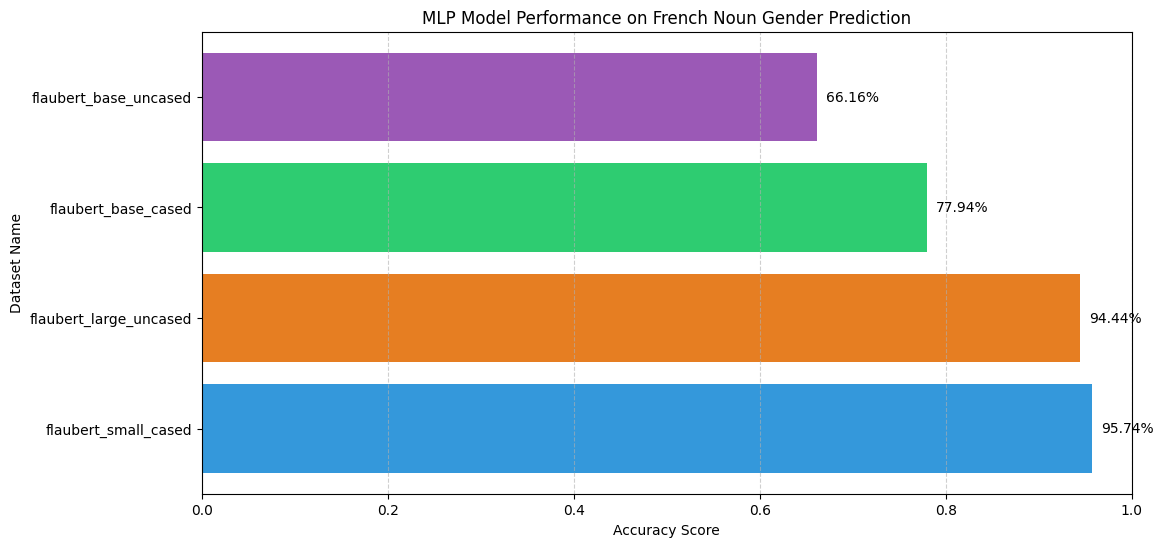

In [12]:
# Sort models by accuracy
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)
model_names, accuracies = zip(*sorted_models)

# Plot Bar Chart
plt.figure(figsize=(12, 6))
bar_colors = ["#3498db", "#e67e22", "#2ecc71", "#9b59b6", "#f1c40f", "#1abc9c", "#d35400", "#16a085", "#c0392b", "#2980b9"]
plt.barh(model_names, accuracies, color=[bar_colors[i % len(bar_colors)] for i in range(len(model_names))])

# Add data labels
for i, acc in enumerate(accuracies):
    plt.text(acc + 0.01, i, f"{acc:.2%}", va="center", fontsize=10, color="black")

# Labels and Title
plt.xlabel("Accuracy Score")
plt.ylabel("Dataset Name")
plt.title(f"MLP Model Performance on French Noun Gender Prediction")
plt.xlim(0, 1)  # Accuracy scale from 0 to 1
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Show plot
plt.show()

# Step 4) Applying SHAP to Understand Global Features Importance


--- Processing SHAP Feature Importance for flaubert_base_cased ---


PermutationExplainer explainer: 2698it [3:14:57,  4.34s/it]                               



--- SHAP Feature Importance Plot for flaubert_base_cased ---


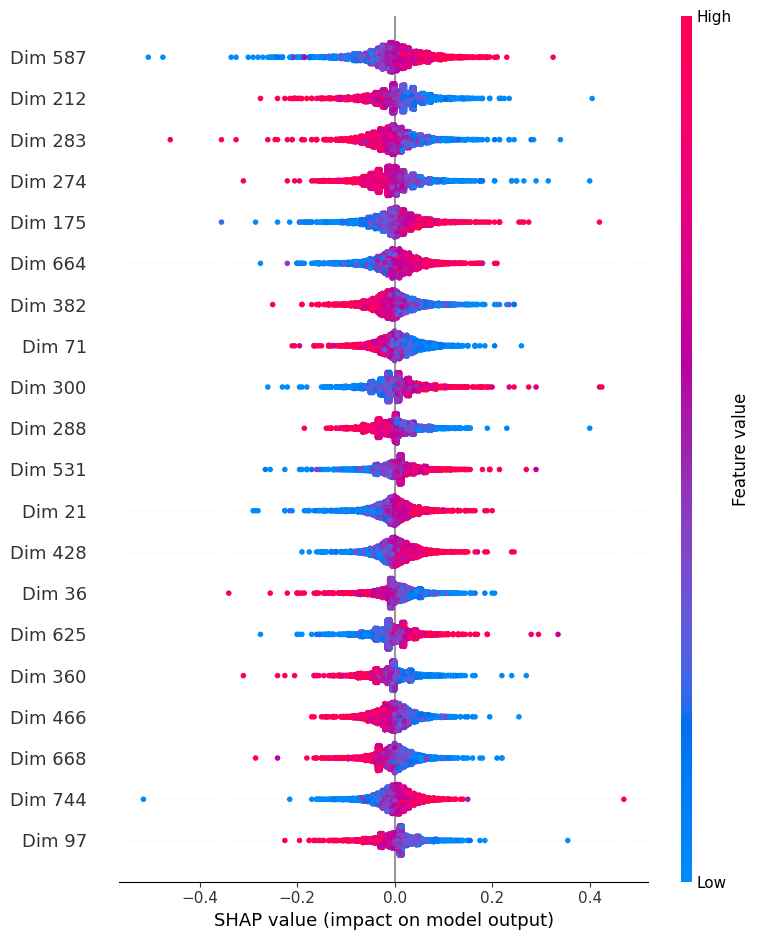


--- Processing SHAP Feature Importance for flaubert_base_uncased ---


PermutationExplainer explainer: 3302it [2:04:41,  2.27s/it]                            



--- SHAP Feature Importance Plot for flaubert_base_uncased ---


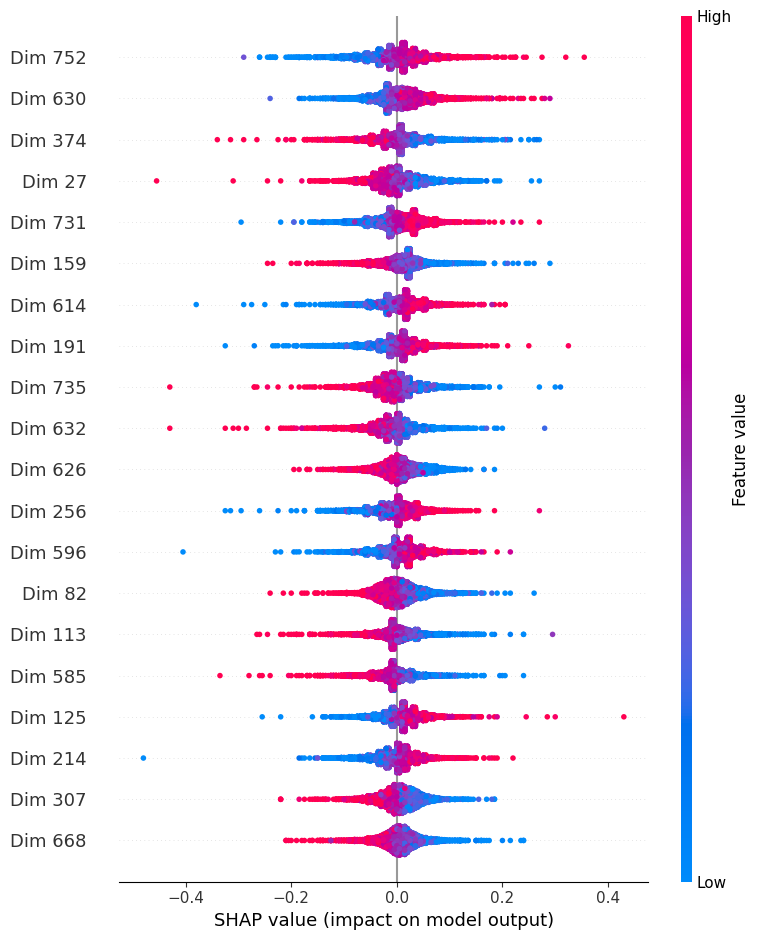


--- Processing SHAP Feature Importance for flaubert_large_uncased ---


PermutationExplainer explainer: 2698it [3:18:20,  4.42s/it]                            



--- SHAP Feature Importance Plot for flaubert_large_uncased ---


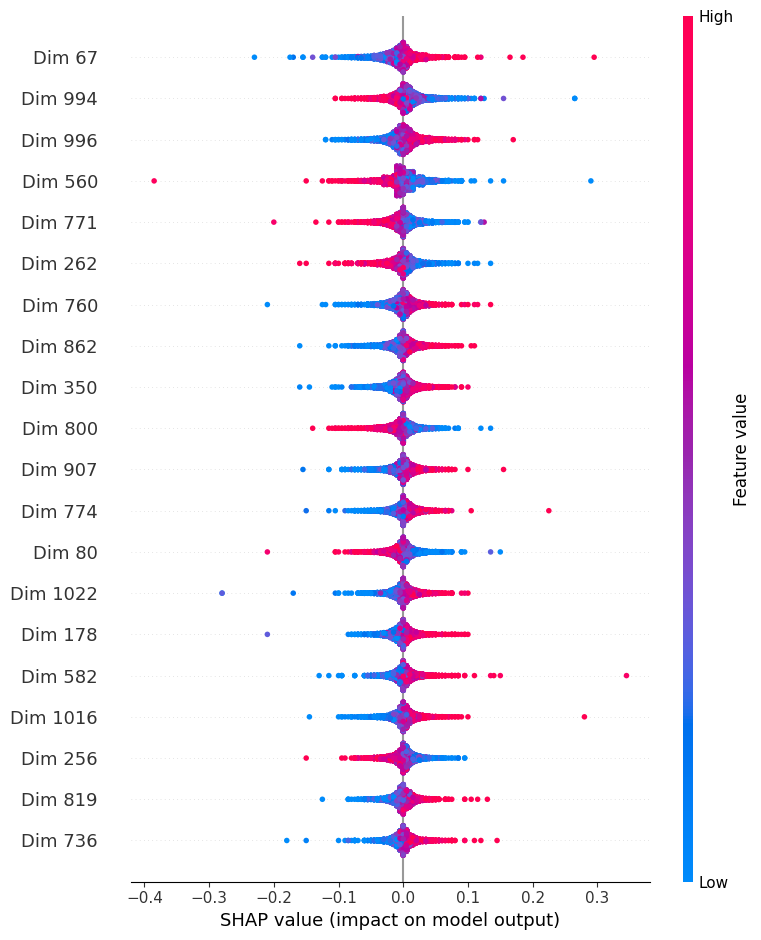


--- Processing SHAP Feature Importance for flaubert_small_cased ---


PermutationExplainer explainer: 2698it [44:46,  1.00it/s]                          



--- SHAP Feature Importance Plot for flaubert_small_cased ---


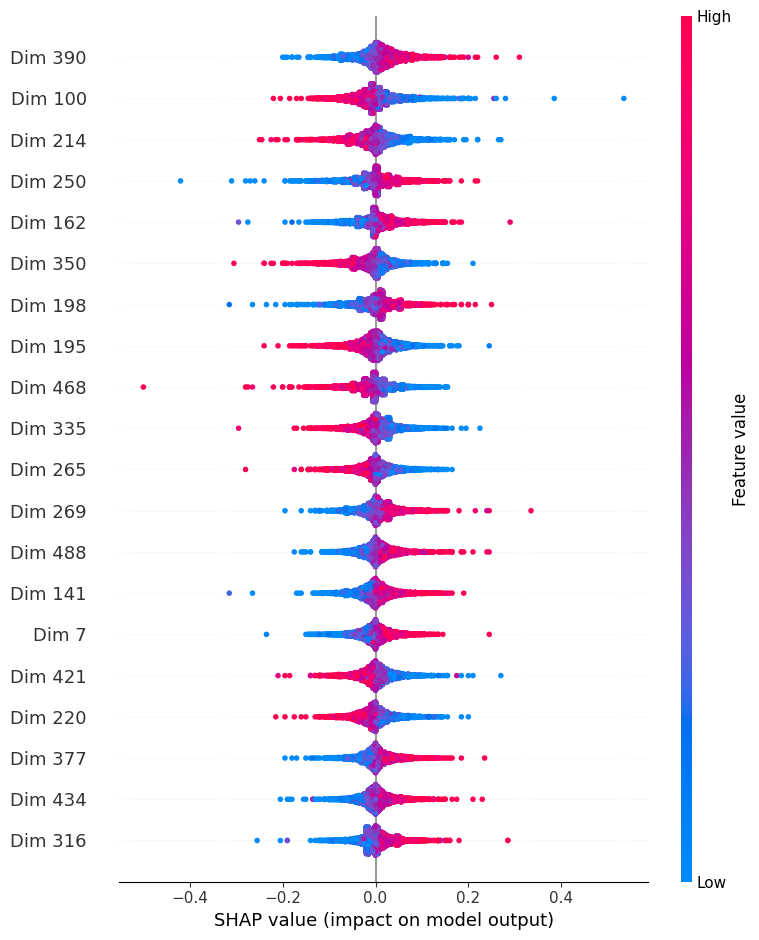

In [13]:
import shap
import numpy as np

# Dictionary to store feature importance for each model
shap_feature_dict = {}

# Loop through trained models and apply SHAP
for name in trained_models.keys():
    print(f"\n--- Processing SHAP Feature Importance for {name} ---")

    # Retrieve stored X_test for the model
    X_test = test_data[name]  # Use the stored test dataset
    perceptron = trained_models[name]  # Use the already trained model

    # Get embedding dimension length dynamically
    embedding_dim = X_test.shape[1]

    # Apply SHAP
    explainer = shap.Explainer(perceptron.predict, X_test)
    shap_values = explainer(X_test, max_evals=embedding_dim * 2 + 1)

    # Compute mean absolute SHAP values per feature
    mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

    # Store feature importance for this model
    shap_feature_dict[name] = mean_abs_shap_values

    # Plot SHAP summary for this model
    print(f"\n--- SHAP Feature Importance Plot for {name} ---")
    shap.summary_plot(shap_values, X_test, feature_names=[f"Dim {i}" for i in range(embedding_dim)])


### 4.1 Saving SHAP Feature Importance Results

In [14]:
import pandas as pd
import numpy as np

# Find the maximum embedding dimension across all models
max_embedding_dim = max(len(v) for v in shap_feature_dict.values())

# Ensure all feature importance arrays have the same length by padding with NaN
for model in shap_feature_dict.keys():
    current_length = len(shap_feature_dict[model])
    if current_length < max_embedding_dim:
        shap_feature_dict[model] = np.pad(
            shap_feature_dict[model], (0, max_embedding_dim - current_length), constant_values=np.nan
        )

# Convert SHAP results into a single DataFrame
shap_feature_importance_all = pd.DataFrame(shap_feature_dict)

# Add feature column names
shap_feature_importance_all.insert(0, "Feature", [f"Dim {i}" for i in range(max_embedding_dim)])

# Sort by highest importance (mean across all models)
shap_feature_importance_all["Mean Importance"] = shap_feature_importance_all.iloc[:, 1:].mean(axis=1)
shap_feature_importance_all = shap_feature_importance_all.sort_values(by="Mean Importance", ascending=False)

# Save to a single CSV file
csv_filename = "shap_feature_importance_all_models.csv"
shap_feature_importance_all.to_csv(csv_filename, index=False)
print(f"\n--- SHAP feature importance saved to {csv_filename} ---")

# Display the table
print("\n--- SHAP Feature Importance Table (Top 50 Features) ---")
display(shap_feature_importance_all.head(50))  # Show the top 50 most important features



--- SHAP feature importance saved to shap_feature_importance_all_models.csv ---

--- SHAP Feature Importance Table (Top 50 Features) ---


,Feature,flaubert_base_cased,flaubert_base_uncased,flaubert_large_uncased,flaubert_small_cased,Mean Importance
752,Dim 752,0.024323,0.040974,0.007429,NaN,0.024242
668,Dim 668,0.028276,0.028154,0.009449,NaN,0.021960
664,Dim 664,0.034488,0.018566,0.004494,NaN,0.019183
630,Dim 630,0.018248,0.036437,0.002773,NaN,0.019153
256,Dim 256,0.008700,0.030603,0.012549,0.020925,0.018194
587,Dim 587,0.045360,0.007513,0.001641,NaN,0.018171
350,Dim 350,0.020363,0.006048,0.014082,0.031281,0.017944
214,Dim 214,0.004957,0.028638,0.004857,0.032759,0.017803
717,Dim 717,0.023241,0.026860,0.003139,NaN,0.017746
994,Dim 994,NaN,NaN,0.017646,NaN,0.017646


# Step 5) Retrain Perceptron Using Selected SHAP Dimensions

### 5.1 Select Top N% (1, 2, 4) Features from SHAP Importance

In [15]:
import pandas as pd
import numpy as np

# Load the SHAP feature importance results
shap_feature_importance_all = pd.read_csv("shap_feature_importance_all_models.csv")

# Dictionary to store selected feature sets for each MLP model
top_features_dict = {}

# Define top SHAP feature selection percentages
percentages = [1, 2, 4]

# Loop through each model's SHAP importance values
for model_name in shap_feature_importance_all.columns[1:-1]:  # Exclude 'Feature' and 'Mean Importance'
    print(f"\n--- Selecting Top SHAP Features for MLP Model: {model_name} ---")

    # Get the total number of features available
    total_features = len(shap_feature_importance_all)

    # Sort feature importance values in descending order
    sorted_features = shap_feature_importance_all[["Feature", model_name]].sort_values(by=model_name, ascending=False)

    # Store top feature sets for different SHAP value thresholds
    top_features_dict[model_name] = {}

    for percent in percentages:
        num_features = int((percent / 100) * total_features)
        selected_features = sorted_features["Feature"].head(num_features).tolist()
        top_features_dict[model_name][percent] = selected_features

print("\n--- SHAP-based Feature Selection for MLP Models Completed ---")



--- Selecting Top SHAP Features for MLP Model: flaubert_base_cased ---

--- Selecting Top SHAP Features for MLP Model: flaubert_base_uncased ---

--- Selecting Top SHAP Features for MLP Model: flaubert_large_uncased ---

--- Selecting Top SHAP Features for MLP Model: flaubert_small_cased ---

--- SHAP-based Feature Selection for MLP Models Completed ---


### 5.2 Retrain MLP Using Top N% SHAP Features

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store new model performance
new_model_accuracies = {}

# Loop through each model and retrain using selected features
for model_name, feature_sets in top_features_dict.items():
    print(f"\n--- Retraining MLP for {model_name} ---")

    # Retrieve original dataset
    df = dataframes[model_name]

    # Ensure dataset has "Gender" and embeddings
    if "Gender" not in df.columns or "Word" not in df.columns:
        print(f"Skipping {model_name} (Missing required columns)")
        continue

    # Extract full feature set
    X_full = df.drop(columns=["Word", "Gender"])
    y = df["Gender"]

    # Ensure dataset column names are strings
    X_full.columns = X_full.columns.astype(str)

    for percent, selected_features in feature_sets.items():
        print(f"\n--- Training with Top {percent}% Features ---")

        # Convert SHAP-selected feature names (e.g., "Dim 302") to match dataset column names
        selected_indices = [int(feature.split(" ")[1]) for feature in selected_features]
        selected_columns = [str(idx) for idx in selected_indices]  # Convert to string to match column names

        # Filter dataset to keep only selected dimensions
        X_selected = X_full[selected_columns].values

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

        # Standardize embeddings
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Train MLP model
        mlp = MLPClassifier(
            hidden_layer_sizes=(100,),  # You can adjust layer size
            max_iter=500,
            alpha=1e-4,
            solver='adam',
            random_state=42,
            early_stopping=True,
            n_iter_no_change=10
        )
        mlp.fit(X_train, y_train)

        # Predictions
        y_pred = mlp.predict(X_test)

        # Model Evaluation
        accuracy = accuracy_score(y_test, y_pred)
        new_model_accuracies[(model_name, percent)] = accuracy

        print(f"Accuracy with Top {percent}% Features: {accuracy:.4f}")
        print(classification_report(y_test, y_pred, target_names=["Feminine (0)", "Masculine (1)"]))

print("\n--- MLP Training Completed ---")



--- Retraining MLP for flaubert_base_cased ---

--- Training with Top 1% Features ---
Accuracy with Top 1% Features: 0.5814
               precision    recall  f1-score   support

 Feminine (0)       0.55      0.34      0.42      1206
Masculine (1)       0.59      0.78      0.67      1491

     accuracy                           0.58      2697
    macro avg       0.57      0.56      0.55      2697
 weighted avg       0.57      0.58      0.56      2697


--- Training with Top 2% Features ---
Accuracy with Top 2% Features: 0.5907
               precision    recall  f1-score   support

 Feminine (0)       0.55      0.47      0.51      1206
Masculine (1)       0.62      0.69      0.65      1491

     accuracy                           0.59      2697
    macro avg       0.58      0.58      0.58      2697
 weighted avg       0.59      0.59      0.59      2697


--- Training with Top 4% Features ---
Accuracy with Top 4% Features: 0.6448
               precision    recall  f1-score   support


#Step 6) Compare Performance of Baseline MLP vs SHAP %N High Importance Features

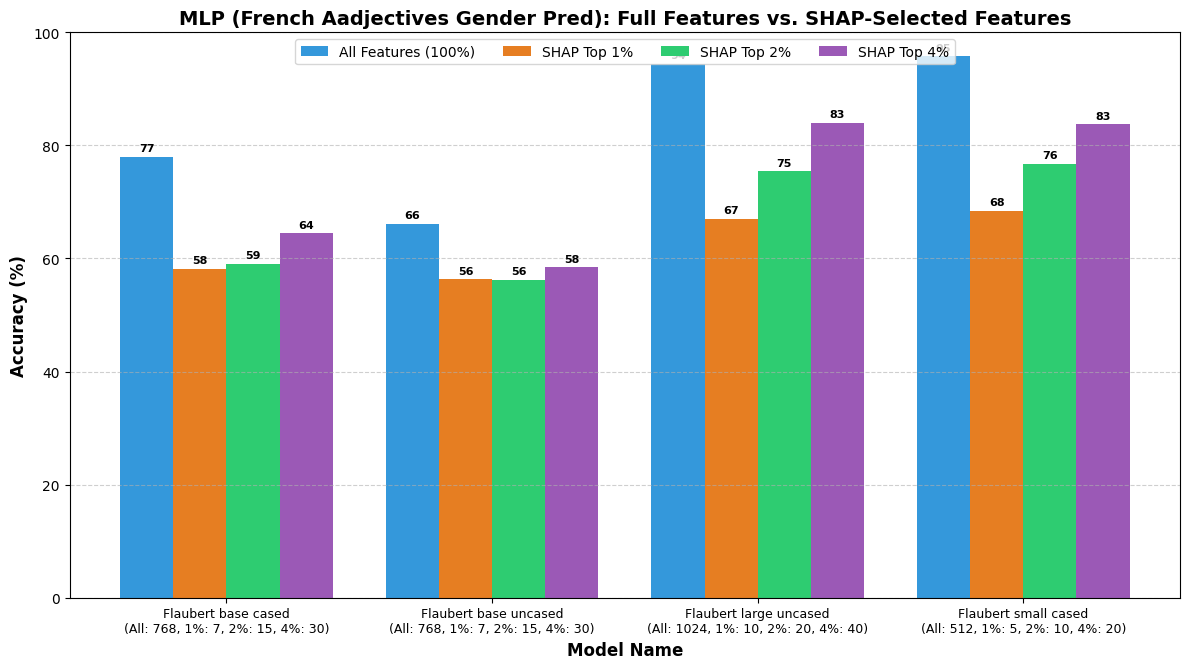

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# Extract baseline model accuracy from previous training and convert to percentages
baseline_accuracies = {name: model_accuracies[name] for name in trained_models.keys()}
baseline_accuracies = {k: v * 100 for k, v in baseline_accuracies.items()}

# Compute each model's valid feature count from the SHAP CSV (non-NaN values)
model_valid_counts = {}
for model in baseline_accuracies.keys():
    if model in shap_feature_importance_all.columns:
        model_valid_counts[model] = shap_feature_importance_all[model].notnull().sum()
    else:
        # Fallback: if the model's column isn't present, use the total row count
        model_valid_counts[model] = len(shap_feature_importance_all)

# Create figure with additional space for footer
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
index = np.arange(len(baseline_accuracies))
colors = ["#3498db", "#e67e22", "#2ecc71", "#9b59b6"]
model_names = list(baseline_accuracies.keys())

# Calculate feature counts for footer
feature_counts = {}
for percent in percentages:
    counts = []
    for model in model_names:
        valid_count = model_valid_counts[model]
        expected_count = int((percent / 100) * valid_count)
        counts.append(expected_count)
    feature_counts[percent] = counts

# Plot full-feature model bars
bars = ax.bar(index, baseline_accuracies.values(), bar_width,
              label="All Features (100%)", color=colors[0])
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f"{int(bar.get_height())}", ha='center', fontsize=8, fontweight='bold')

# Plot SHAP-selected feature bars for each percentage
for i, percent in enumerate(percentages):
    shap_accuracies = {
        name: new_model_accuracies.get((name, percent), 0) * 100
        for name in baseline_accuracies.keys()
    }

    # Use simple legend labels
    legend_label = f"SHAP Top {percent}%"

    bars = ax.bar(index + (i + 1) * bar_width, shap_accuracies.values(),
                  bar_width, label=legend_label, color=colors[i + 1])

    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f"{int(bar.get_height())}", ha='center', fontsize=8, fontweight='bold')

# Formatting main plot
ax.set_xlabel("Model Name", fontsize=12, fontweight="bold")
ax.set_ylabel("Accuracy (%)", fontsize=12, fontweight="bold")
ax.set_title("MLP (French Aadjectives Gender Pred): Full Features vs. SHAP-Selected Features",
             fontsize=14, fontweight="bold")
# Create x-tick labels with feature counts included
x_labels = []
for i, model in enumerate(model_names):
    # Format model name: replace underscores with spaces and capitalize first letter
    model_display = model.replace("_", " ").capitalize()

    # Add feature counts on a new line
    feature_info = f"{model_display}\n(All: {model_valid_counts[model]}"

    # Add feature counts for each percentage
    for percent in percentages:
        feature_info += f", {percent}%: {feature_counts[percent][i]}"

    feature_info += ")"
    x_labels.append(feature_info)

ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=9)
ax.set_ylim(0, 100)
ax.grid(axis="y", linestyle="--", alpha=0.6)

# Move legend to above the plot instead of inside it
# This places the legend horizontally above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4, fontsize=10)

# Add a little space at the top for the legend
plt.subplots_adjust(top=0.85, bottom=0.15)
plt.tight_layout(rect=[0, 0.05, 1, 0.90])
plt.show()

# Step 7) Show the feature index numbers (dimensions) for each model's top N% SHAP features

In [18]:
import pandas as pd

# List to collect all rows for the summary table
all_rows = []

# For each model in top_features_dict (keys should correspond to model names/columns in the SHAP CSV)
for model_name, perc_dict in top_features_dict.items():
    # Compute the valid feature count for this model (non-NaN values in its SHAP column)
    if model_name in shap_feature_importance_all.columns:
        valid_count = shap_feature_importance_all[model_name].notnull().sum()
    else:
        valid_count = len(shap_feature_importance_all)

    for percent, feature_names in perc_dict.items():
        # Get the index positions for each selected feature from the SHAP table (matches on "Feature" column)
        feature_indexes = []
        for fname in feature_names:
            match = shap_feature_importance_all[shap_feature_importance_all["Feature"] == fname]
            if not match.empty:
                feature_indexes.append(match.index[0])

        # Calculate the expected number of features for this model and percentage
        expected_count = int((percent / 100) * valid_count)

        all_rows.append({
            "Model": model_name,
            "Top %": f"{percent}%",
            "Total Features": valid_count,
            "Top % Feature Count": expected_count,
            "Feature Indexes": ", ".join(map(str, feature_indexes))
        })

# Convert the collected rows into a DataFrame
combined_df = pd.DataFrame(all_rows)

# Save the DataFrame to a CSV file
combined_df.to_csv("shap_top_nouns_gender_feature_indexes_summary.csv", index=False)

# Display the final combined table
print("\nCombined SHAP Feature Index Table Saved as 'shap_top_feature_indexes_summary.csv'")
display(combined_df)



Combined SHAP Feature Index Table Saved as 'shap_top_feature_indexes_summary.csv'


,Model,Top %,Total Features,Top % Feature Count,Feature Indexes
0,flaubert_base_cased,1%,768,7,"5, 31, 102, 132, 21, 2, 27, 128, 45, 167"
1,flaubert_base_cased,2%,768,15,"5, 31, 102, 132, 21, 2, 27, 128, 45, 167, 64, ..."
2,flaubert_base_cased,4%,768,30,"5, 31, 102, 132, 21, 2, 27, 128, 45, 167, 64, ..."
3,flaubert_base_uncased,1%,768,7,"0, 3, 62, 14, 34, 68, 84, 164, 100, 20"
4,flaubert_base_uncased,2%,768,15,"0, 3, 62, 14, 34, 68, 84, 164, 100, 20, 95, 4,..."
5,flaubert_base_uncased,4%,768,30,"0, 3, 62, 14, 34, 68, 84, 164, 100, 20, 95, 4,..."
6,flaubert_large_uncased,1%,1024,10,"24, 9, 10, 249, 26, 113, 398, 52, 6, 61"
7,flaubert_large_uncased,2%,1024,20,"24, 9, 10, 249, 26, 113, 398, 52, 6, 61, 69, 9..."
8,flaubert_large_uncased,4%,1024,40,"24, 9, 10, 249, 26, 113, 398, 52, 6, 61, 69, 9..."
9,flaubert_small_cased,1%,512,5,"54, 23, 7, 51, 114, 6, 28, 73, 16, 47"
